<div align="middle">
  <h1><b><i>تمرین سوم</i></b></h1>
 </div>




<div align="right" dir="auto">
    
   #  بخش اول:  هدوپ 

    ۱- به سوالات زیر پاسخ دهید
    - مفهوم replication جیست
    - مفهوم block در HDFS چیست و اگر بلاک‌ها را بسیار کوچک درنظر بگیریم چه مشکلی پیش می‌آید
    
</div>
  
    

<div align="right" dir="auto">

    ۱- اصطلاح Replication به معنی ایجاد کپی‌های داده روی چند datanode است که باعث می‌شود که در صورت بروز مشکل و خرابی داده از دست نرود.
        
    ۲- واحدهای ذخیرسازی داده در HDFS را بلاک می‌گوند. یک فایل HDFS دنباله‌ای از بلاک‌ها است که در کلاستر چندین سرور ذخیره می‌شود. اندازه بلاک‌ها معمولا ۶۴ مگابایت است. اگر بلاک‌ها را بسیار کوچک در نظر بگیریم، تعداد زیادی بلاک خواهیم داشت و همچنین مقدار زیادی metadata باید ذخیره شود.  و اگر بلاک کوچک باشد باعث می‌شود یک split ورودی نیاز به جا شدن در تعداد زیادی بلاک داشته باشه و به صورت مکرر روی hdfs بنویسیم و برای دسترسی مجدد به  splitورودی باید از تعداد زیادی بلاک بخوانیم و مراجعه زیادی به hdfs داشته باشیم و این باعث می‌شود سرعت‌مان کاهش پیدا کند.
</div> 


<div align="right" dir="auto">

<div align="right" dir="auto">
   

    ۲- در  این قسمت شما باید ابتدا دیتاست داده شده را از حالت فشرده در بیاورید و سپس فایل‌های درون آن را در کلاستر هدوپ در مسیر /homework3/dataset/ بارگزاری کنید 
    نکته: در این بخش دستورات زده شده خود را برای کار با hdfs  در ترمینال را در سلول زیر وارد نمایید
    برای دسترسی به کامند 'hdfs dfs'  میتوانید وارد یکی از کانتینر‌های هدوپ شوید و دستور را اجرا کنید همچنین همه کانتینر‌ها دارای shared_dir
    در روت خود هستند و این دایرکتوری در تمام کانتینر‌ها به اشتراک گذاشته شده است
    برای چک کردن فایل‌ها در hdfs به 
    
[HDFS webUI](http://localhost:9870/explorer.html#/)
    
    مراجعه کنید
 </div>

hdfs dfs -mkdir -p /homework3/dataset/

hdfs dfs -put shared_dir/dataset/Weapon.json /homework3/dataset

hdfs dfs -put shared_dir/dataset/War.json /homework3/dataset

<div align="right" dir="auto">
    
   #  بخش دوم:  اسپارک 

    ۱- به سوالات زیر پاسخ دهید
    - مزیت اسپارک نسبت به مدل قدیمی map/reduce چیست؟
    -  تفاوت action و transform در اسپارک چیست؟
    
</div>
  
    

<div align="right" dir="auto">

    ۱- در معماری map reduce خروجی نتایج map را روی disk می‌نویسیم ولی در spark نتایج میانی را در ram می‌نویسیم که می‌شود سرعت بالاتری داشته باشیم و همچنین اگر در مراحل میانی به failure بخوریم با بازگشت به یه مرحله قبل کار را ادامه دهیم و متوجه شویم مشکل از کجا است.
    

        
    ۲- عملیات RDD به دو دسته transformation  و action تقسیم می‌شود. در transformation خروجی یک RDD است اما در action خروجی یک مقدار است. عملیاتی مانند map و فیلتر جزو transformation هستند و عملیاتی مانند reduce و count جزو action است.
</div> 


<div align="right" dir="auto">

<div align="right" dir="auto">
    

    ۲- کد‌های خواسته شده در قسمت‌های پایینی را تکمیل کنید
    (قسمت های ToDo )
</div>
  
    


<div align="right" dir="auto">
   
##  اتصال به کلاستر اسپارک و هدوپ 

    در این قسمت از تمرین باید به عنوان درایور یک سسشن  به کلاستر اسپارک بسازیم.
 </div>
  
    

In [1]:
import pyspark
from pyspark import SparkContext 
from pyspark.sql import SparkSession,Row
from pyspark.sql.functions import *
import math
import pandas , numpy
import matplotlib
import pprint
    


In [3]:
spark = SparkSession.builder.appName("homework3").master("spark://spark-master:7077").config("fs.defaultFS","hdfs://namenode:9000/").getOrCreate()
spark


<div align="right" dir="auto">
   
#  خواندن داده 

    :در اسپارک ما ساختارهای مختلفی برای کار با داده و پخش شدن آن‌ها در شبکه داریم که به ۳ دسته تقسیم بندی میشوند 
+ RDD
+ Dataset
+ DataFrame
    
    
     برای مطالعه بیشتر به لینک زیر مراجعه کنید:
[rdd-vs-dataframe-vs-dataset](https://phoenixnap.com/kb/rdd-vs-dataframe-vs-dataset)

    ما در درس با ساختار RDD آشنا شدیم حال در این تمرین میخواهیم با ساختار Dataframe آشنا شویم و به کمک آن دیتا را از روی HDFS بخوانیم و روی آن فایل‌ها پردازش انجام دهیم
 
 </div>
  
    

- [Spark Cluster Master UI](http://localhost:8080/)
- [Application master UI (driver UI)](http://localhost:4040)
- [Web Hdfs](http://localhost:9870/explorer.html#/)


<div align="right" dir="auto">
 .در این قسمت دیتاست را لود می‌کنیم 
</div>

In [4]:
War = spark.read.json(f"/homework3/dataset/War.json")
Weapon = spark.read.json("/homework3/dataset/Weapon.json")

<div align="right" dir="auto">
برای اینکه بتوانیم روی دیتای لود شده به وسیله تابع  spark.sql
    کوئری‌های SQL بزنیم
    باید دو دیتاست لود شده را به عنوان table
    به spark 
    معرفی کنیم
</div>

In [5]:
War.registerTempTable("War")
Weapon.registerTempTable("Weapon")


<div align="right" dir="auto">
یک مثال ...
</div>

In [6]:
spark.sql("SELECT * FROM War where DurationOfWar=1005.0 limit 1;").show()

+-----------+-------------+--------+-------------+--------------+------------+
|  DateOfWar|DurationOfWar|Location|MinorityStart|TargetMinority|      Weapon|
+-----------+-------------+--------+-------------+--------------+------------+
|73298-04-22|       1005.0|BIEN HOA|          Elf|           Orc|Mirkwood Bow|
+-----------+-------------+--------+-------------+--------------+------------+



In [8]:
War.select("*").filter(col("DurationOfWar")==1005.0).limit(1).show()

+-----------+-------------+------------+-------------+--------------+------------+
|  DateOfWar|DurationOfWar|    Location|MinorityStart|TargetMinority|      Weapon|
+-----------+-------------+------------+-------------+--------------+------------+
|73361-06-05|       1005.0|TAN SON NHUT|          Elf|           Orc|Belthronding|
+-----------+-------------+------------+-------------+--------------+------------+



<div align="right" dir="auto">
 ده رکورد آخر را نمایش دهید
</div>

In [9]:
spark.sql("SELECT * FROM War ORDER BY DateOfWar DESC limit 10;").show()

+-----------+-------------+-------------+-------------+--------------+---------+
|  DateOfWar|DurationOfWar|     Location|MinorityStart|TargetMinority|   Weapon|
+-----------+-------------+-------------+-------------+--------------+---------+
|73365-06-30|       1800.0|NAKHON PHANOM|          Elf|        Nazgul|     null|
|73365-06-30|        800.0|NAKHON PHANOM|          Elf|        Nazgul|     null|
|73365-06-30|        800.0|      U TAPAO|          Elf|        Nazgul|     null|
|73365-06-30|        800.0|NAKHON PHANOM|          Elf|        Nazgul|     null|
|73365-06-30|       1800.0|NAKHON PHANOM|          Elf|        Nazgul|     null|
|73365-06-30|        800.0|     UDORN AB|          Elf|        Nazgul|     null|
|73365-06-30|        800.0|        KORAT|          Elf|        Nazgul|Glamdring|
|73365-06-30|        800.0|     UDORN AB|          Elf|        Nazgul|  Andúril|
|73365-06-30|        800.0|NAKHON PHANOM|          Elf|        Nazgul|     null|
|73365-06-30|        800.0|N

In [8]:
spark.sql("SELECT * FROM Weapon limit 10;").show()

+--------------------+------------+
|         Description|      Weapon|
+--------------------+------------+
|Narya has the pow...|       Narya|
| Vilya was the st...|       Vilya|
|"Reforged from th...|     Andúril|
|"A sword in The H...|     Orcrist|
| Legolas wielded ...|Mirkwood Bow|
|Galadriel’s ring ...|       Nenya|
|"A sword in The H...|   Glamdring|
|A sword wielded b...|    Aranrúth|
|The Ring was a si...| Master Ring|
|A knife in The Ho...|       Sting|
+--------------------+------------+



<div align="right" dir="auto">
اسکیما یا ساختار دیتاست ها را نمایش دهید

</div>

In [10]:
War.printSchema()
Weapon.printSchema()

root
 |-- DateOfWar: string (nullable = true)
 |-- DurationOfWar: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinorityStart: string (nullable = true)
 |-- TargetMinority: string (nullable = true)
 |-- Weapon: string (nullable = true)

root
 |-- Description: string (nullable = true)
 |-- Weapon: string (nullable = true)



### Expected
![image](expected_answers/1.png)


<div align="right" dir="auto">
   
#  اسپارک SQL 

    مهمترین قابلیت اسپارک این است که می‌تواند با خواندن فایل‌ها به صورت توزیع شده روی آن‌ها پردازش انجام دهد و این پردازش را برنامه ‌نویس میتواند با استفاده از دستورات SQL اعمال کند
    در این بخش از شما انتظار می‌رود که به وسیله spark SQL  به اسپارک کوئری  بزنید . 
    
    
 </div>

[pyspark.sql.functions.col](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.col.html)

[pyspark.sql.DataFrame.count](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.count.html)

[pyspark.sql.DataFrame.filter](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html)

[pyspark.sql.DataFrame.groupBy](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html)

<div align="right" dir="auto">
 چه تعداد نبرد در کل این دوران‌ها انجام شده است؟
</div>

In [11]:
War.count()

4400775

### Expected
![image](expected_answers/2.png)

<div align="right" dir="auto">
هر نژاد در چه تعدادی نبرد مشارکت داشته اند  به صورت مرتب شده نمایش دهبد؟
</div>

In [11]:
War.groupBy('MinorityStart').count().sort('count', ascending=False).show()

+-------------+-------+
|MinorityStart|  count|
+-------------+-------+
|          Elf|3708997|
|          Orc| 622013|
|       Goblin|  32777|
|        Dwarf|  24469|
|       Hobbit|  12519|
+-------------+-------+



In [17]:
War.groupBy('MinorityStart').count().sort('count', ascending=False).toPandas()

,MinorityStart,count
0,Elf,3708997
1,Orc,622013
2,Goblin,32777
3,Dwarf,24469
4,Hobbit,12519


### Expected
![image](expected_answers/3.png)


<div align="right" dir="auto">
   
#  اسپارک toPandas 

    یکی ار قابلیت‌های اسپارک این است که می‌توان dataframe های آن را به 
    dataframe های pandas تبدیل کند و از توابع آن از جمله
    توابع plot  آن برای رسم نمودار استفاده کرد.
    در این قسمت از شما انتظار می‌رود نمودار تعداد جنگ‌ها بر اساس هر گونه را رسم کنید.
    
 </div>
  
    

  
[pyspark.sql.DataFrame.toPandas](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.toPandas.html)

[pyspark.pandas.DataFrame.plot](https://spark.apache.org/docs/3.2.1/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.html)


<AxesSubplot: xlabel='MinorityStart'>

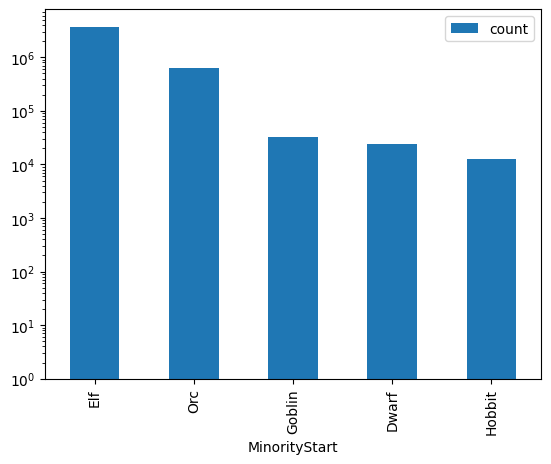

In [13]:
war_df = War.groupBy('MinorityStart').count().sort('count', ascending=False).toPandas()
war_df.plot.bar(x='MinorityStart', y='count' ,log=True)

### Expected
![image](expected_answers/plotlib.png)

<div align="right" dir="auto">
چه تعداد نبردهایی بر اساس زمان انجام شده بر اساس زمان مرتب کنید
</div>

In [15]:
War.groupBy('DateOfWar').count().sort('DateOfWar', ascending=True).toPandas()

,DateOfWar,count
0,73295-10-01,447
1,73295-10-02,652
2,73295-10-03,608
3,73295-10-04,532
4,73295-10-05,769
...,...,...
3555,73365-06-26,25
3556,73365-06-27,30
3557,73365-06-28,22
3558,73365-06-29,15


In [16]:
War.groupBy('DateOfWar').count().sort('DateOfWar', ascending=True).show()

+-----------+-----+
|  DateOfWar|count|
+-----------+-----+
|73295-10-01|  447|
|73295-10-02|  652|
|73295-10-03|  608|
|73295-10-04|  532|
|73295-10-05|  769|
|73295-10-06|  738|
|73295-10-07|  655|
|73295-10-08|  764|
|73295-10-09|  746|
|73295-10-10|  848|
|73295-10-11|  503|
|73295-10-12|  511|
|73295-10-13|  395|
|73295-10-14|  469|
|73295-10-15|  492|
|73295-10-16|  533|
|73295-10-17|  381|
|73295-10-18|  529|
|73295-10-19|  649|
|73295-10-20|  624|
+-----------+-----+
only showing top 20 rows



### Expected
![image](expected_answers/date_groupBy.png)

<div align="right" dir="auto">
نژاد "اورک" توسط چه نژادی مورد حمله قرار گرفته است ؟
</div>

In [18]:
War.select('MinorityStart').filter(col("TargetMinority")=='Orc').distinct().toPandas()

,MinorityStart
0,Elf
1,Orc
2,Hobbit
3,Dwarf


In [19]:
War.select('MinorityStart').filter(col("TargetMinority")=='Orc').distinct().show()

+-------------+
|MinorityStart|
+-------------+
|          Elf|
|          Orc|
|       Hobbit|
|        Dwarf|
+-------------+



### Expected
![image](expected_answers/orc_target.png)


<div align="right" dir="auto">
   
#  اسپارک Shuffle 

    Spark SQL shuffle مکانیزمی است برای توزیع مجدد یا پارتیشن بندی مجدد داده ها به طوری که داده ها به طور متفاوت در پارتیشن ها گروه بندی می شوند، بر اساس اندازه داده شما ممکن است نیاز باشد تعداد پارتیشن های RDD/DataFrame را با استفاده از اسپارک کاهش یا افزایش دهید.
    برای مثال وقتی روی دو dataframe مختلف که روی شبکه توزیع شده اند
    دستور join را میزنیم یک عملیات 
    shuffling انجام میشود
    در این قسمت از شما انتظار می‌رود کوئری جوین زیر را نوشته و اجرا کنید همچنین به  صفحه 
    application master ui
    مراجعه کنید و نحوه shuffleing را گزارش کنید . 
     و همچنین توضیح دهید DAG scheduler  در اسپارک چیست ؟
 </div>
  
    

  
[shuffling in standalone cluster](https://medium.com/@rachit1arora/apache-spark-shuffle-service-there-are-more-than-one-options-c1a8e098230e)



<div align="right" dir="auto">
    هر وقت یک Action مانند count روی RDD انجام دهیم، اسپارک یک DAG می‌سازد و به DAG Scheduler ارسال می‌کنه. DAG Scheduler عملیاتی که داریم را به چند تا Stage از Taskها تقسیم می‌کند. یک Stage شامل Taskهایی است که روی پارتیشن داده‌های ورودی تشکیل شده. DAG Scheduler عملگرهای مدنظر را برای اجرا روی دیتا با هم پایپ‌لاین می‌کند. برای مثال خیلی از Mapهایی که میخواهیم روی دیتا بزنیم می‌توانند در یک‌ Single Stage توسط DAG Scheduler زمان‌بندی و برنامه‌ریزی شوند و در آخر نتیجه نهایی DAG Scheduler مجموعه‌ای از Stageها هست.
</div>

![images](pictures/p2.png)

![images](pictures/p1.png)

<div align="right" dir="auto">
    
    بیشترین سلاحی که در این جنگ ها استفاده شده کدام سلاح  بوده است؟.
    جزییات این سلاح را از فایل مشخصات سلاح (Weapon) می‌توانید بدست آورید.
    فایل مربوط به سلاح ها را بازخوانی کرده و برای نمایش بین دو فایل از join استفاده شود.

</div>

In [21]:
p1 = War.join(Weapon,"Weapon").groupBy("Weapon").count()
p2 = p1.join(Weapon,"Weapon").select("Weapon",col("count").alias("MissionCount"),"Description")
p2.sort('count', ascending=False).show()

+------------+------------+--------------------+
|      Weapon|MissionCount|         Description|
+------------+------------+--------------------+
|     Andúril|      909362|"Reforged from th...|
|       Narya|      451385|Narya has the pow...|
|       Vilya|      372975| Vilya was the st...|
|     Orcrist|      358498|"A sword in The H...|
|Mirkwood Bow|      267457| Legolas wielded ...|
|       Nenya|      242231|Galadriel’s ring ...|
|   Glamdring|      165773|"A sword in The H...|
|    Aranrúth|      146543|A sword wielded b...|
| Master Ring|      144601|The Ring was a si...|
|       Sting|      140410|A knife in The Ho...|
|       Grond|       99100|"The name of the ...|
|Dragon-helm |       82219|A helmet owned an...|
|      Aeglos|       76525|A spear wielded b...|
|    Herugrim|       75058|A sword that belo...|
|   Red Arrow|       73843|"A black-feathere...|
|   Anglachel|       71716|A sword forged by...|
|    Gúthwinë|       58691|A sword wielded b...|
|Belthronding|      

### Expected
![image](expected_answers/most_used_weapons.png)

     # ToDo
     # Refere to Application master UI


<div align="right" dir="auto">
   
# تابع تعریف شده توسط کاربر(UDF)

    یکی از مزایای اسپارک این است که نه تنها برای ما یک زبان SQL فراهم کرده که روی چندین سرور به صورت همزمان پردازش را انجام دهد بلکه 
    میتوان به زبان‌های مختلف توابعی تعریف کرد که روی  همه executor ها اجرا شود
    در این بخش از شما انتظار می‌رود که با نوشتن یک UDF به زبان پایتونی 
    توضیحات هر اسلحه را به 3 کلمه اول آن کوتاه کنید و بقیه کلمات را حذف کنید و سوتونی به نام short_description را به داده های 
    Weapon اضافه کنید
    
    
 </div>
 
[pyspark.sql.functions.udf](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.functions.udf.html)

[pyspark.sql.DataFrame.withColumn](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html)

    



In [23]:

@udf
def substring(str):
    resStr=""
    arr = str.split(" ")
    for x in arr[0:3]:
        resStr= resStr + x + " "
    return resStr
    
Weapon.withColumn('short_description',substring("Description")).show()

+--------------------+------------+--------------------+
|         Description|      Weapon|   short_description|
+--------------------+------------+--------------------+
|Narya has the pow...|       Narya|      Narya has the |
| Vilya was the st...|       Vilya|          Vilya was |
|"Reforged from th...|     Andúril| "Reforged from the |
|"A sword in The H...|     Orcrist|        "A sword in |
| Legolas wielded ...|Mirkwood Bow|    Legolas wielded |
|Galadriel’s ring ...|       Nenya|Galadriel’s ring ...|
|"A sword in The H...|   Glamdring|        "A sword in |
|A sword wielded b...|    Aranrúth|    A sword wielded |
|The Ring was a si...| Master Ring|       The Ring was |
|A knife in The Ho...|       Sting|         A knife in |
|"The name of the ...|       Grond|       "The name of |
|A helmet owned an...|Dragon-helm |     A helmet owned |
|A spear wielded b...|      Aeglos|    A spear wielded |
|A sword that belo...|    Herugrim|       A sword that |
|"A black-feathere...|   Red Ar

### Expected
![image](expected_answers/shortener_udf.png)


<div align="right" dir="auto">
   
# نوشتن داده و پارتیشنینگ
    زمانی که میخواهیم داده های حجیم را به صورت فایل هایی ذخیره کنیم  نمیتوانیم همه داده را در یک فایل بزرگ ذخیره کنیم به چند دلیل :
-  ذخیره سازی یک فایل بزرگ باعث ؛تنها نقطه شکست میشود؛ و با حذف آن کل داده از دست میرود
- جستجو در این یک فایل بزرگ که مرتب شده نیست دشوار و عملی نیست
- آپدیت کردن سخت تر میشود
پس تا حدودی حل این میشکل از راه حل های زیر استفاده میکنیم
# پارتیشنینگ: 
-     بر اساس یک فیلد داده هارا دسته بندی میکنیم و در دایرکتوری های مختلف میریزیم این کار را اسپارک برای ما انجام میدهد

    
 </div>
  
    



<div align="right" dir="rtl">

    در این بخش شما باید یک دیتاست کامل بسازید بدین شکل که دیتاست War و Weapon
     را با یکدیگر جوین کنید سپس همه آن رکورد‌هایی که  در توضیحات اسلحه آنها کلمه sword 
    نیامده است را فیلتر کرده و برا اساس گونه شروع کننده جنگ (MinorityStart) پارتیشن کنید
    و روی HDFS
      در مسیر /homework3/<student_number>/output/war_without_sword بنویسید
    و ۲۰ رکورد اول آن را نمایش دهید
    توجه کنید فایل‌های خروجی باید از نوع JSON باشند
    
    
</div>

[pyspark.sql.DataFrameWriter.partitionBy](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrameWriter.partitionBy.html)


In [29]:

p1 = Weapon.filter(~Weapon.Description.contains("sword"))
p2 = p1.join(War,on='Weapon')
p3 = p2.select("DateOfWar", "DurationOfWar", "Location", "MinorityStart", "TargetMinority", "Weapon", "Description")
p3.show()

p3.write.partitionBy('MinorityStart').json("/homework3/9831025_9831108/output/war_without_sword/")

+-----------+-------------+-------------+-------------+--------------+------------+--------------------+
|  DateOfWar|DurationOfWar|     Location|MinorityStart|TargetMinority|      Weapon|         Description|
+-----------+-------------+-------------+-------------+--------------+------------+--------------------+
|73361-06-05|       1005.0| TAN SON NHUT|          Elf|           Orc|Belthronding|A bow wielded by ...|
|73362-12-26|        530.0|NAKHON PHANOM|          Elf|           Orc|Belthronding|A bow wielded by ...|
|73363-07-28|        730.0|     UDORN AB|          Elf|        Goblin|       Nenya|Galadriel’s ring ...|
|73360-10-08|       1240.0|       DANANG|          Orc|           Orc|Mirkwood Bow| Legolas wielded ...|
|73362-03-08|       1005.0|  TONKIN GULF|          Elf|        Goblin|       Vilya| Vilya was the st...|
|73362-09-12|        710.0| TAN SON NHUT|          Elf|           Orc|Belthronding|A bow wielded by ...|
|73361-05-12|       1304.0|  TONKIN GULF|          Elf|

### Expected
![war without sword](expected_answers/war_without_sword.png)




<div align="right" dir="rtl">
    
  ### گزارش HDFS
    با مراجعه به HDFS UI
    خروجی پارتیشن شده مسیر بالا را مشاهده میکنید
     -تعداد دایرکتوری‌های ایجاد شده چندتاست و دلیل آن چیست؟ 
    -در هر دایرکتوری ایجاد شده چند فایل JSON میبینید و دلیل تعدد این فایل‌ها چیست؟
    - چگونه میتوان از اسپارک خواست تا از تعدد این فایل‌ها جلوگیری کند و یک فایل در این مسیر‌ها بریزد؟
    - coalesce و repartition  در اسپارک چیستند و کاربر اصلی آنها چیست؟
</div>



<div align=”right dir="auto">
    1-
تعداد دایرکتوری ها به تعداد minority start یعنی 5 تا است . خود ما در قسمتpartition by  همچین انتخابی را انجام داده ایم.
</div>

![image](pictures/p5.png)

<div align=”right dir="auto">
    2-
در هر دایرکتوری 5 فایل JSON وجود
</div>

![image](pictures/p6.png)

<div align=”right dir="auto">
    3-
    میتوان از coalesce استفاده کرد تا یک فایل ایجاد کند .
</div>


<div align=”right dir="auto">

    4-
در این قسمت Repartition  می تواند برای افزایش یا کاهش تعداد پارتیشن ها در یک DataFrame استفاده شود. پارتیشن مجدد کل عملیات Shuffle است. کل داده ها از پارتیشن های موجود خارج می شوند و به طور مساوی در پارتیشن های تازه تشکیل شده توزیع می شوند. اگر مجموعه داده‌ای را که بارگذاری کرده‌ایم ، شامل داده‌های عظیم و تبدیل‌های زیادی است که به توزیع مساوی از اجراکنندگان نیاز دارند، باید از Repartition استفاده کنیم.
 وهمچنین  Coalesce تعداد پارتیشن های یک DataFrame را کاهش می دهد. از جابجایی کامل اجتناب می کند. به جای ایجاد پارتیشن‌های جدید، داده‌ها را با استفاده از Hash Partitioner (پیش‌فرض) به هم ریخته و در پارتیشن‌های موجود تنظیم می‌کند. یعنی فقط می تواند تعداد پارتیشن ها را کاهش دهد. هنگامی که همه تبدیل‌ها اعمال شدند، از Coalesce استفاده می¬کنیم تا همه داده‌ها را به جای تعداد زیادی فایل در فایل‌های کمتری (تعداد فایل = تعداد پارتیشن) ذخیره کند.



</div>



<div align="right" dir="rtl">

   ## coalesce
    همان تسک بالا را انجام دهید  ولی  سعی کنید در هر دایرکتوری پارتیشن شده تنها یک فایل JSON ریخته شود.
    نکته:  در مسیر جدید زیر آن را بنویسید.
    /homework3/<student_number>/output/war_without_sword_v2/
    
    
</div>

[pyspark.sql.DataFrame.coalesce](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.coalesce.html)


In [30]:
p3.coalesce(1).write.partitionBy("MinorityStart").json("/homework3/9831025_9831108/output/war_without_sword_v2/")